In [1]:
from WBT.whitebox_tools import WhiteboxTools
import rasterio
import os
import matplotlib.pyplot as plt
import numpy as np
import shutil

wbt = WhiteboxTools()

In [22]:
# Working directory looks like this:
#
#├───surfaces
#│   ├───clear
#│   │       hemicylinder_clear.tif
#│   │       hemisphere_clear.tif
#│   │       paraboloid_clear.tif
#│   │
#│   ├───filtered
#│   │   ├───AdaptiveFilter
#│   │   │       hemicylinder_filtered.tif
#│   │   │       hemisphere_filtered.tif
#│   │   │       paraboloid_filtered.tif
#│   │   │
#│   │   ├───BilateralFilter
#│   │   ├───ConservativeSmoothingFilter
#│   │   ├───EdgePreservingMeanFilter
#│   │   ├───FeaturePreservingSmoothing
#│   │   ├───KNearestMeanFilter
#│   │   ├───LeeSigmaFilter
#│   │   ├───MajorityFilter
#│   │   ├───MeanFilter
#│   │   │       hemicylinder_filtered.tif
#│   │   │       hemisphere_filtered.tif
#│   │   │       paraboloid_filtered.tif
#│   │   │
#│   │   ├───MedianFilter
#│   │   │       hemicylinder_filtered.tif
#│   │   │       hemisphere_filtered.tif
#│   │   │       paraboloid_filtered.tif
#│   │   │
#│   │   └───OlympicFilter
#│   └───noisy
#│           hemicylinder_noisy.tif
#│           hemisphere_noisy.tif
#│           paraboloid_noisy.tif

In [2]:
os.chdir(r'C:\\Users\\sasha\\abstract_surfaces\\')

In [3]:
entries = os.listdir('./surfaces/')
entries

['clear', 'filtered', 'noisy']

In [4]:
clear_dems = os.listdir('./surfaces/' + entries[0])
noisy_dems = os.listdir('./surfaces/' + entries[2])
filtered_dems = os.listdir('./surfaces/' + entries[1])

print(f'Clear dems: {clear_dems}', f'Noisy dems: {noisy_dems}', f'Filtered dems: {filtered_dems}', sep='\n')

Clear dems: ['hemicylinder_clear.tif', 'hemisphere_clear.tif', 'paraboloid_clear.tif']
Noisy dems: ['hemicylinder_noisy.tif', 'hemisphere_noisy.tif', 'paraboloid_noisy.tif']
Filtered dems: []


In [5]:
arr_clear_dems = []
for clear_dem in clear_dems:
    
    tmp_path = r'C:\Users\sasha\abstract_surfaces\surfaces\clear\\' + clear_dem
    #print(tmp_path)
    
    with rasterio.open(tmp_path, 'r') as ds:
        arr_in = ds.read()
    #arr_clear_dems[clear_dem] = arr_in[0]
    arr_clear_dems.append(arr_in[0])
    #plt.imshow(arr_noisy_dems[-1], cmap='binary')
    #plt.show()
    print(f'Appended {clear_dem}')

Appended hemicylinder_clear.tif
Appended hemisphere_clear.tif
Appended paraboloid_clear.tif


In [6]:
arr_noisy_dems = []
for noisy_dem in noisy_dems:
    
    tmp_path = r'C:\Users\sasha\abstract_surfaces\surfaces\noisy\\' + noisy_dem
    #print(tmp_path)
    
    with rasterio.open(tmp_path, 'r') as ds:
        arr_in = ds.read()
    #arr_noisy_dems[noisy_dem] = arr_in[0]
    arr_noisy_dems.append(arr_in[0])
    #plt.imshow(arr_noisy_dems[-1], cmap='binary')
    #plt.show()
    print(f'Appended {noisy_dem}')

Appended hemicylinder_noisy.tif
Appended hemisphere_noisy.tif
Appended paraboloid_noisy.tif


In [83]:
filter_list = (
    r'MeanFilter\\',
    r'MedianFilter\\',
    r'AdaptiveFilter\\',
    r'BilateralFilter\\'
)

In [87]:
arr_filtered_dems = []
for noisy_dem in noisy_dems:
    
    tmp_path = r'C:\Users\sasha\abstract_surfaces\surfaces\noisy\\' + noisy_dem
    filter_dir = r'C:\Users\sasha\abstract_surfaces\surfaces\filtered\\'
    
    wbt.verbose = True
    
    #MeanFilter
    output_path = filter_dir + filter_list[0] + noisy_dem[:-10] + '_filtered.tif'
    
    wbt.mean_filter(
        i = tmp_path, 
        output = output_path, 
        filterx=5, 
        filtery=5
    )
    
    #MedianFilter
    output_path = filter_dir + filter_list[1] + noisy_dem[:-10] + '_filtered.tif'
    
    wbt.median_filter(
        i = tmp_path, 
        output = output_path, 
        filterx=5, 
        filtery=5,
        sig_digits=2
    )
    
    #AdaptiveFilter
    output_path = filter_dir + filter_list[2] + noisy_dem[:-10] + '_filtered.tif'
    
    wbt.adaptive_filter(
        i = tmp_path, 
        output = output_path, 
        filterx=5, 
        filtery=5, 
        threshold=0.6
    )
    
    #BilateralFilter
    output_path = filter_dir + filter_list[3] + noisy_dem[:-10] + '_filtered.tif'
    
    wbt.bilateral_filter(
        i = tmp_path, 
        output = output_path, 
        sigma_dist=0.75, 
        sigma_int=0.6
    )

.\whitebox_tools.exe --run="MeanFilter" --input='C:\Users\sasha\abstract_surfaces\surfaces\noisy\\hemicylinder_noisy.tif' --output='C:\Users\sasha\abstract_surfaces\surfaces\filtered\\MeanFilter\\hemicylinder_filtered.tif' --filterx=5 --filtery=5 -v --compress_rasters=False

****************************
* Welcome to MeanFilter    *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Reading data...
Creating integral images: 0%
Creating integral images: 1%
Creating integral images: 2%
Creating integral images: 3%
Creating integral images: 4%
Creating integral images: 5%
Creating integral images: 6%
Creating integral images: 7%
Creating integral images: 8%
Creating integral images: 10%
Creating integral images: 11%
Creating integral images: 12%
Creating integral images: 13%
Creating integral images: 14%
Creating integral images: 15%
Creating integral images: 16%
Creating integral images: 17%
Creating integral images: 19%
Creating integral images: 20%
Cr

Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.2s
.\whitebox_tools.exe --run="AdaptiveFilter" --input='C:\Users\sasha\abstract_surfaces\surfaces\noisy\\hemicylinder_noisy.tif' --output='C:\Users\sasha\abstract_surfaces\surfaces\filtered\\AdaptiveFilter\\hemicylinder_filtered.tif' --filterx=5 --filtery=5 --threshold=0.6 -v --compress_rasters=False

*****************************
* Welcome to AdaptiveFilter *
* Powered by Whiteb

Creating integral images: 21%
Creating integral images: 22%
Creating integral images: 23%
Creating integral images: 24%
Creating integral images: 25%
Creating integral images: 26%
Creating integral images: 27%
Creating integral images: 28%
Creating integral images: 29%
Creating integral images: 30%
Creating integral images: 31%
Creating integral images: 32%
Creating integral images: 33%
Creating integral images: 34%
Creating integral images: 35%
Creating integral images: 36%
Creating integral images: 37%
Creating integral images: 38%
Creating integral images: 39%
Creating integral images: 40%
Creating integral images: 41%
Creating integral images: 42%
Creating integral images: 43%
Creating integral images: 44%
Creating integral images: 45%
Creating integral images: 46%
Creating integral images: 47%
Creating integral images: 48%
Creating integral images: 49%
Creating integral images: 50%
Creating integral images: 51%
Creating integral images: 52%
Creating integral images: 53%
Creating i

Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.3s
.\whitebox_tools.exe --run="AdaptiveFilter" --input='C:\Users\sasha\abstract_surfaces\surfaces\noisy\\hemisphere_noisy.tif' --output='C:\Users\sasha\abstract_surfaces\surfaces\filtered\\AdaptiveFilter\\hemisphere_filtered.tif' --filterx=5 --filtery=5 --threshold=0.6 -v --compress_rasters=False

*****************************
* Welcome to AdaptiveFilter *
* Powered by WhiteboxTools  *
* www.whiteboxgeo.com       *
*****************************
Reading data...
Calculating integ

Creating integral images: 2%
Creating integral images: 3%
Creating integral images: 4%
Creating integral images: 5%
Creating integral images: 6%
Creating integral images: 7%
Creating integral images: 8%
Creating integral images: 9%
Creating integral images: 10%
Creating integral images: 11%
Creating integral images: 12%
Creating integral images: 13%
Creating integral images: 14%
Creating integral images: 15%
Creating integral images: 16%
Creating integral images: 17%
Creating integral images: 18%
Creating integral images: 19%
Creating integral images: 20%
Creating integral images: 21%
Creating integral images: 22%
Creating integral images: 23%
Creating integral images: 24%
Creating integral images: 25%
Creating integral images: 26%
Creating integral images: 27%
Creating integral images: 28%
Creating integral images: 29%
Creating integral images: 30%
Creating integral images: 31%
Creating integral images: 32%
Creating integral images: 33%
Creating integral images: 34%
Creating integral 

Performing analysis: 61%
Performing analysis: 62%
Performing analysis: 63%
Performing analysis: 64%
Performing analysis: 65%
Performing analysis: 66%
Performing analysis: 67%
Performing analysis: 68%
Performing analysis: 69%
Performing analysis: 70%
Performing analysis: 71%
Performing analysis: 72%
Performing analysis: 73%
Performing analysis: 74%
Performing analysis: 75%
Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 81%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%

Saving data...
Output file written
Elapsed Time (excluding I/O): 0.9s


In [23]:
#**Analysing results**

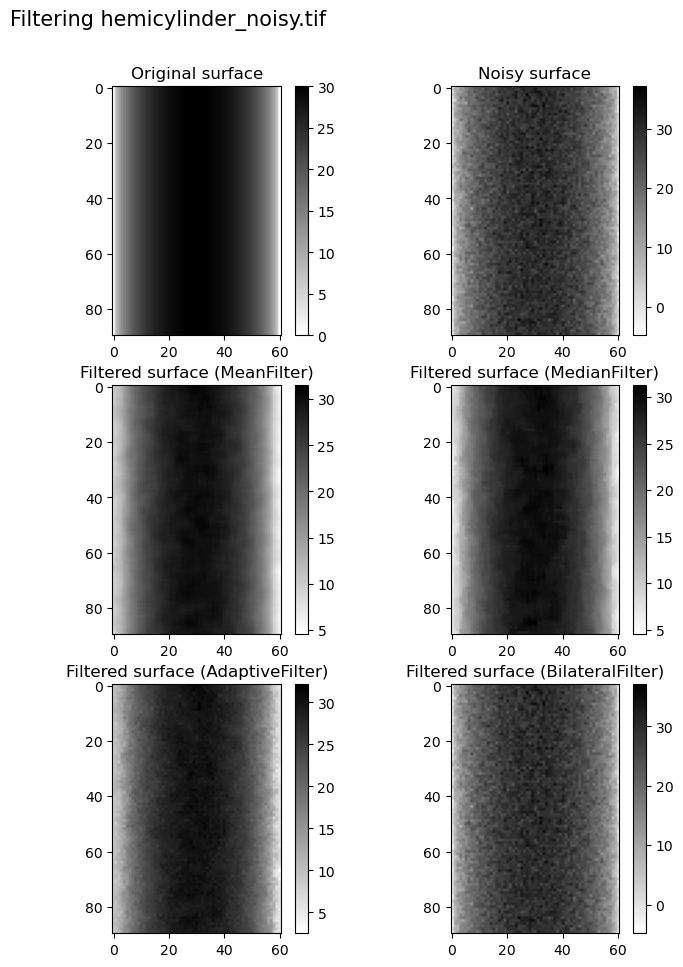

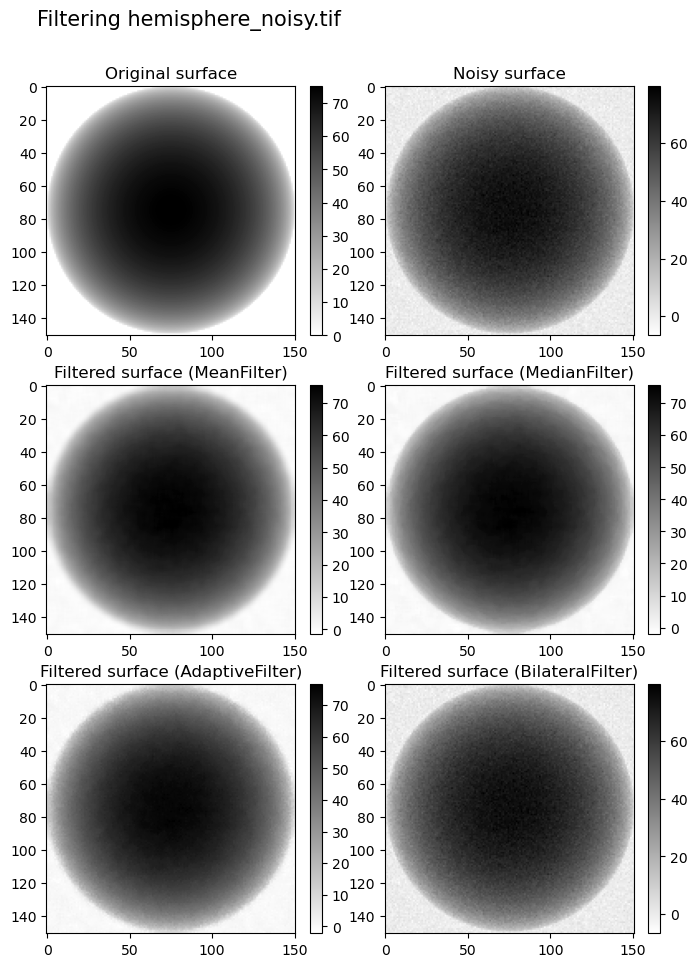

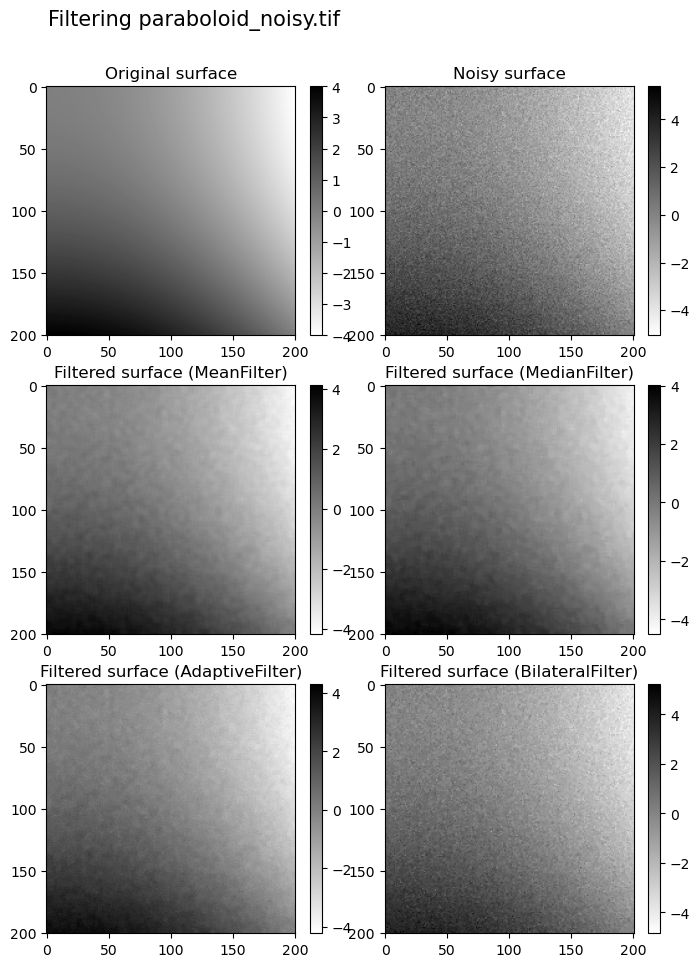

In [88]:
for noisy_dem in noisy_dems:
    
    filter_dir = r'C:\Users\sasha\abstract_surfaces\surfaces\filtered\\'
               
    fig = plt.figure(figsize=(8,11))
    
    fig.suptitle(f'Filtering {noisy_dem}', y=.95, horizontalalignment='right', verticalalignment='top', fontsize = '15')
    
    rast_path = r'C:\Users\sasha\abstract_surfaces\surfaces\clear\\' + noisy_dem[:-10] + '_clear.tif'
    with rasterio.open(rast_path, 'r') as ds:
        data_clear = ds.read()
    
    ax1 = fig.add_subplot(321)
    ax1.set_title('Original surface')
    plt.imshow(data_clear[0], cmap='binary')
    plt.colorbar(fraction=0.045)
    
    rast_path = r'C:\Users\sasha\abstract_surfaces\surfaces\noisy\\' + noisy_dem
    with rasterio.open(rast_path, 'r') as ds:
        data_noisy = ds.read()

    ax2 = fig.add_subplot(322)
    ax2.set_title('Noisy surface')
    plt.imshow(data_noisy[0], cmap='binary')
    plt.colorbar(fraction=0.045)
    
    #MeanFilter
    rast_path = filter_dir + filter_list[0] + noisy_dem[:-10] + '_filtered.tif'
    with rasterio.open(rast_path, 'r') as ds:
        data_filt_0 = ds.read()
        
    ax3 = fig.add_subplot(323)
    ax3.set_title('Filtered surface (MeanFilter)')
    plt.imshow(data_filt[0], cmap='binary')
    plt.colorbar(fraction=0.045)
    
    #MedianFilter
    rast_path = filter_dir + filter_list[1] + noisy_dem[:-10] + '_filtered.tif'
    with rasterio.open(rast_path, 'r') as ds:
        data_filt_1 = ds.read()
        
    ax4 = fig.add_subplot(324)
    ax4.set_title('Filtered surface (MedianFilter)')
    plt.imshow(data_filt[0], cmap='binary')
    plt.colorbar(fraction=0.045)
    
    #AdaptiveFilter
    rast_path = filter_dir + filter_list[2] + noisy_dem[:-10] + '_filtered.tif'
    with rasterio.open(rast_path, 'r') as ds:
        data_filt_2 = ds.read()
        
    ax5 = fig.add_subplot(325)
    ax5.set_title('Filtered surface (AdaptiveFilter)')
    plt.imshow(data_filt[0], cmap='binary')
    plt.colorbar(fraction=0.045)
    
    #BilateralFilter
    rast_path = filter_dir + filter_list[3] + noisy_dem[:-10] + '_filtered.tif'
    with rasterio.open(rast_path, 'r') as ds:
        data_filt_3 = ds.read()
        
    ax5 = fig.add_subplot(326)
    ax5.set_title('Filtered surface (BilateralFilter)')
    plt.imshow(data_filt[0], cmap='binary')
    plt.colorbar(fraction=0.045)
    plt.show()
    
    
    
    print()